In [178]:
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
%matplotlib inline

# Loading raw itemsets data

In [179]:
itemset_results_path = pathlib.Path("../dataset/itemsets")
raw_itemsets_df = pd.read_csv(itemset_results_path, sep=' ', header=None, names=['dates', 'stations', 'density'])

In [180]:
raw_itemsets_df.columns

Index(['dates', 'stations', 'density'], dtype='object')

In [181]:
raw_itemsets_df.loc[0]

dates       21/12/2007:,05/02/2008:,06/10/2008:,05/09/2009...
stations    A222,A931,A354,A929,A545,A933,A915,A737,A218,A...
density                                              0.469077
Name: 0, dtype: object

# Creating dates and stations dfs

# Dates per itemset

In [182]:
item_1_dates = [date.split(":")[0] for date in raw_itemsets_df.loc[0].dates.split(",")]
item_2_dates = [date.split(":")[0] for date in raw_itemsets_df.loc[1].dates.split(",")]
len(item_1_dates), len(item_2_dates)

(3124, 3129)

In [183]:
dates_per_itemset_df = pd.DataFrame()
dates_per_itemset_df['date'] = item_1_dates + item_2_dates
dates_per_itemset_df['date'] = pd.to_datetime(dates_per_itemset_df['date'], format="%d/%m/%Y")
dates_per_itemset_df['itemset'] = [1]*len(item_1_dates) + [2]*len(item_2_dates)

In [184]:
dates_per_itemset_df.head()

,date,itemset
0,2007-12-21,1
1,2008-02-05,1
2,2008-10-06,1
3,2009-09-05,1
4,2008-01-12,1


In [185]:
intersect_dates = set(item_1_dates).intersection(set(item_2_dates))
len(intersect_dates)

3115

Existe uma interseção muito grande entre as datas presentes no itemset1 com o itemset2.

In [186]:
dates_only_item_1 = set(item_1_dates).difference(set(item_2_dates))
dates_only_item_1

{'01/10/2016',
 '05/02/2008',
 '07/12/2008',
 '09/12/2022',
 '12/04/2022',
 '13/05/2011',
 '19/01/2021',
 '19/04/2021',
 '21/12/2007'}

In [187]:
dates_only_item_2 = set(item_2_dates).difference(set(item_1_dates))
dates_only_item_2

{'05/05/2010',
 '07/06/2020',
 '11/07/2010',
 '11/10/2022',
 '16/07/2009',
 '16/07/2016',
 '16/09/2013',
 '20/05/2010',
 '21/06/2014',
 '21/09/2022',
 '22/05/2012',
 '22/10/2010',
 '26/09/2022',
 '29/05/2012'}

# Stations per itemset

In [188]:
item_1_stations = raw_itemsets_df.loc[0].stations.split(",")
item_2_stations = raw_itemsets_df.loc[1].stations.split(",")
len(item_1_stations), len(item_2_stations)

(335, 338)

In [189]:
stations_per_itemset_df = pd.DataFrame()
stations_per_itemset_df['station'] = item_1_stations + item_2_stations
stations_per_itemset_df['itemset'] = [1]*len(item_1_stations) + [2]*len(item_2_stations)

In [190]:
intersect_stations = set(item_1_stations).intersection(set(item_2_stations))
len(intersect_stations)

335

Aparentemente, todas as estações no primeiro itemset estão no segundo também.

In [191]:
stations_only_item_1 = set(item_1_stations).difference(set(item_2_stations))
stations_only_item_1

set()

In [192]:
stations_only_item_2 = set(item_2_stations).difference(set(item_1_stations))
stations_only_item_2

{'A322', 'A754', 'A826'}

# Plotting dates

In [193]:
import matplotlib.dates as mdates
from datetime import datetime
import seaborn as sns
import numpy as np

<Axes: xlabel='date', ylabel='itemset'>

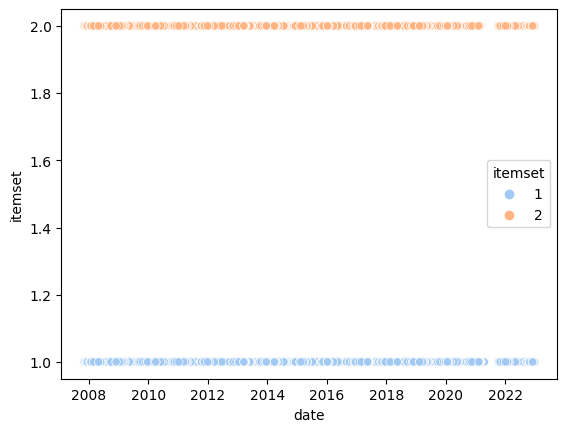

In [194]:
sns.scatterplot(dates_per_itemset_df, x='date',  y= 'itemset', hue='itemset', palette='pastel')

# Ploting stations

In [195]:
stations_data_path = pathlib.Path("../dataset/STATION_DATA.CSV")
stations_info_df = pd.read_csv(stations_data_path, sep=";")

In [196]:
background_img = plt.imread('assets/map_print.png')

In [197]:
def get_longitude(x):
    a = stations_info_df.query('CODIGO == @x')['LONGITUDE'].values[0]
    return float(a.replace(',', '.'))

def get_latitude(x):
    a = stations_info_df.query('CODIGO == @x')['LATITUDE'].values[0]
    return float(a.replace(',', '.'))
    
stations_per_itemset_df['Longitude'] = stations_per_itemset_df['station'].apply(get_longitude)
stations_per_itemset_df['Latitude'] = stations_per_itemset_df['station'].apply(get_latitude)

In [198]:
stations_per_itemset_df

,station,itemset,Longitude,Latitude
0,A222,1,-44.233333,-6.033333
1,A931,1,-53.883611,-14.927778
2,A354,1,-42.146944,-6.974167
3,A929,1,-54.956111,-13.686389
4,A545,1,-44.835556,-17.257778
...,...,...,...,...
668,A407,2,-40.119722,-13.528333
669,A509,2,-46.043333,-22.861389
670,A202,2,-47.930833,-1.300833
671,A401,2,-38.516667,-13.016667


In [199]:
BBox = (-72.78666666, -29.31666666, -33.74166666, 4.47749999)

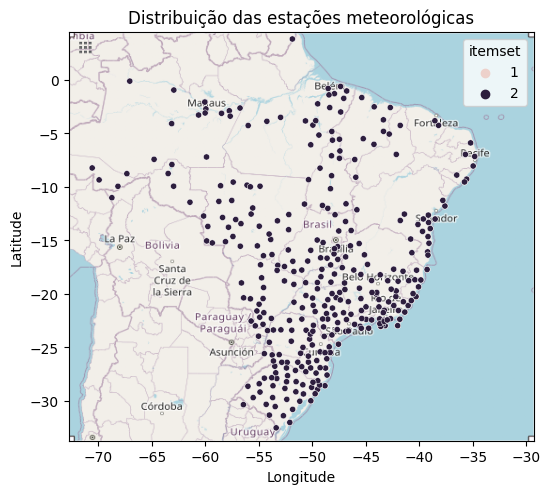

In [200]:
fig, ax = plt.subplots(figsize = (6,6))
# itemset_2_only = stations_per_itemset_df[stations_per_itemset_df.station.isin({'A322', 'A754', 'A826'})]
sns.scatterplot(data=stations_per_itemset_df, x='Longitude', y="Latitude", hue='itemset',
                hue_order=['2', '1'], ax=ax, s=20)
ax.set_title('Distribuição das estações meteorológicas')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(background_img, zorder=0, extent = BBox, aspect= 'equal')
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.savefig("./assets/nclusterbox_itemset_dist.png")
plt.show()

In [201]:
itemset2_only_df = stations_per_itemset_df.query("itemset == 2").drop('itemset', axis=1)
itemset2_only_df['chosen'] = 1

In [202]:
itemset2_only_df

,station,Longitude,Latitude,chosen
335,A222,-44.233333,-6.033333,1
336,A931,-53.883611,-14.927778,1
337,A354,-42.146944,-6.974167,1
338,A754,-54.971944,-20.981667,1
339,A929,-54.956111,-13.686389,1
...,...,...,...,...
668,A407,-40.119722,-13.528333,1
669,A509,-46.043333,-22.861389,1
670,A202,-47.930833,-1.300833,1
671,A401,-38.516667,-13.016667,1


In [203]:
stations_info_df.head()

,REGIAO,UF,MUNICIPIO,CODIGO,LATITUDE,LONGITUDE,ALTITUDE
0,CO,DF,AGUAS EMENDADAS,A045,"-15,59638888","-47,62583332",1200
1,CO,DF,BRASILIA,A001,"-15,78944444","-47,92583332","1159,54"
2,CO,DF,BRAZLANDIA,A042,"-15,59972221","-48,1311111",1143
3,CO,DF,GAMA (PONTE ALTA),A046,"-15,93527777","-48,13749999",990
4,CO,DF,PARANOA (COOPA-DF),A047,"-16,01111111","-47,5575",1043


In [204]:
stations_info_df['LONGITUDE'] = stations_info_df['LONGITUDE'].apply(lambda x: float(x.replace(",", ".")))
stations_info_df['LATITUDE'] = stations_info_df['LATITUDE'].apply(lambda x: float(x.replace(",", ".")))

In [205]:
minor_stations_info_df = stations_info_df.drop(['REGIAO', 'UF', 'MUNICIPIO','ALTITUDE'], axis=1)

In [206]:
minor_stations_info_df.head()

,CODIGO,LATITUDE,LONGITUDE
0,A045,-15.596389,-47.625833
1,A001,-15.789444,-47.925833
2,A042,-15.599722,-48.131111
3,A046,-15.935278,-48.137500
4,A047,-16.011111,-47.557500


In [207]:
minor_stations_info_df = minor_stations_info_df[~minor_stations_info_df.CODIGO.isin(item_2_stations)]

In [208]:
minor_stations_info_df['chosen'] = 0
minor_stations_info_df = minor_stations_info_df[['CODIGO', 'LONGITUDE', 'LATITUDE', 'chosen']]

In [209]:
minor_stations_info_df.head()

,CODIGO,LONGITUDE,LATITUDE,chosen
2,A042,-48.131111,-15.599722,0
3,A046,-48.137500,-15.935278,0
4,A047,-47.557500,-16.011111,0
10,A056,-47.625833,-16.399444,0
11,A029,-49.914722,-17.336944,0


In [210]:
minor_stations_info_df.columns = ['station', 'Longitude', 'Latitude', 'chosen']

In [211]:
chosen_and_not_df = pd.concat([minor_stations_info_df, itemset2_only_df], ignore_index=True)

In [212]:
chosen_and_not_df.head()

,station,Longitude,Latitude,chosen
0,A042,-48.131111,-15.599722,0
1,A046,-48.137500,-15.935278,0
2,A047,-47.557500,-16.011111,0
3,A056,-47.625833,-16.399444,0
4,A029,-49.914722,-17.336944,0


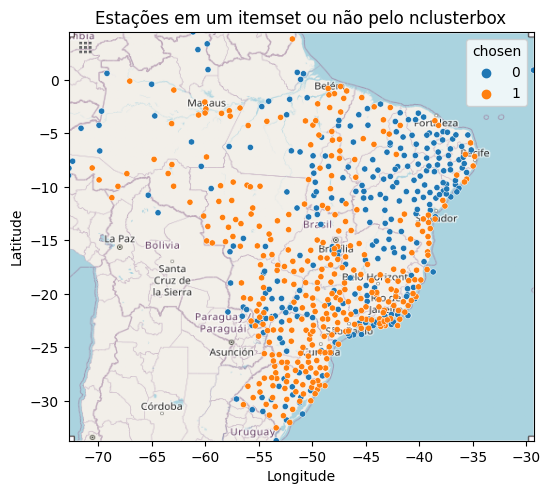

In [217]:
ig, ax = plt.subplots(figsize = (6,6))
# itemset_2_only = stations_per_itemset_df[stations_per_itemset_df.station.isin({'A322', 'A754', 'A826'})]
sns.scatterplot(data=chosen_and_not_df, x='Longitude', y='Latitude', hue='chosen', ax=ax, s=20)
ax.set_title('Estações em um itemset ou não pelo nclusterbox')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(background_img, zorder=0, extent = BBox, aspect= 'equal')
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.savefig("./assets/nclusterbox-itemset-and-not.png")
plt.show()